In [0]:
import pandas as pd
df = pd.read_csv('ejemploMI.csv')

#Vemos que hay un valor de lactato que se sale de la capacidad de medición del gasómetro (hasta 15). Lo eliminamos ya que es un único valor
df=df[df['lactato']<=15]

In [0]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=4,
         n_init=10,
         max_iter=300,
         tol=1e-04,
         random_state=None)
X=df.iloc[:,[3,6,7,8]].values

from sklearn.preprocessing import StandardScaler

#Escalamos las variables
sc = StandardScaler()
sc.fit(X)
X_std=sc.transform(X)


y_km=km.fit_predict(X_std)

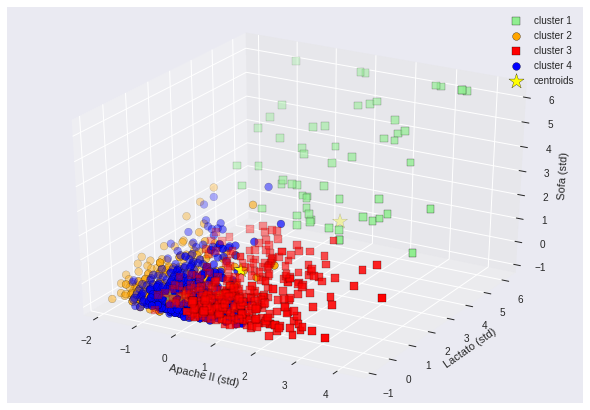

In [52]:
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

fig = plt.figure()

ax = Axes3D(fig) 

ax.scatter(X_std[y_km==0,0],X_std[y_km==0,3],X_std[y_km==0,3],s=60,c='lightgreen',marker='s',edgecolor='black',label='cluster 1')
ax.scatter(X_std[y_km==1,0],X_std[y_km==1,3],X_std[y_km==1,3],s=60,c='orange',marker='o',edgecolor='black',label='cluster 2')
ax.scatter(X_std[y_km==2,0],X_std[y_km==2,3],X_std[y_km==2,3],s=60,c='red',marker='s',edgecolor='black',label='cluster 3')
ax.scatter(X_std[y_km==3,0],X_std[y_km==3,3],X_std[y_km==3,3],s=60,c='blue',marker='o',edgecolor='black',label='cluster 4')
#ax.scatter(X_std[y_km==4,0],X_std[y_km==4,3],X_std[y_km==4,3],s=60,c='white',marker='s',edgecolor='black',label='cluster 5')
ax.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,3],km.cluster_centers_[:,2],s=250,marker='*',c='yellow',edgecolor='black',label='centroids')
ax.set_xlabel('Apache II (std)')
ax.set_ylabel('Lactato (std)')
ax.set_zlabel('Sofa (std)')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()